# Breast Cancer

## Importing required libraries

In [4]:
import pandas as pd 
import numpy as np
import tensorflow as tf 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
Data = pd.read_csv('BrestCancerDataset/breast-cancer.csv')
Data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
Data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##### Change the diagnosis column to 1 if M and 0 if B

In [10]:
# Check unique values in the diagnosis column before mapping
print("Unique values in 'diagnosis' column before mapping:", Data['diagnosis'].unique())

# Change the diagnosis column to 1 if M and 0 if B
Data['diagnosis'] = Data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Check unique values in the diagnosis column after mapping
print("Unique values in 'diagnosis' column after mapping:", Data['diagnosis'].unique())

# Display the first few rows to verify the change
Data.head(3)

Unique values in 'diagnosis' column before mapping: ['M' 'B']
Unique values in 'diagnosis' column after mapping: [1 0]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Data Visualization

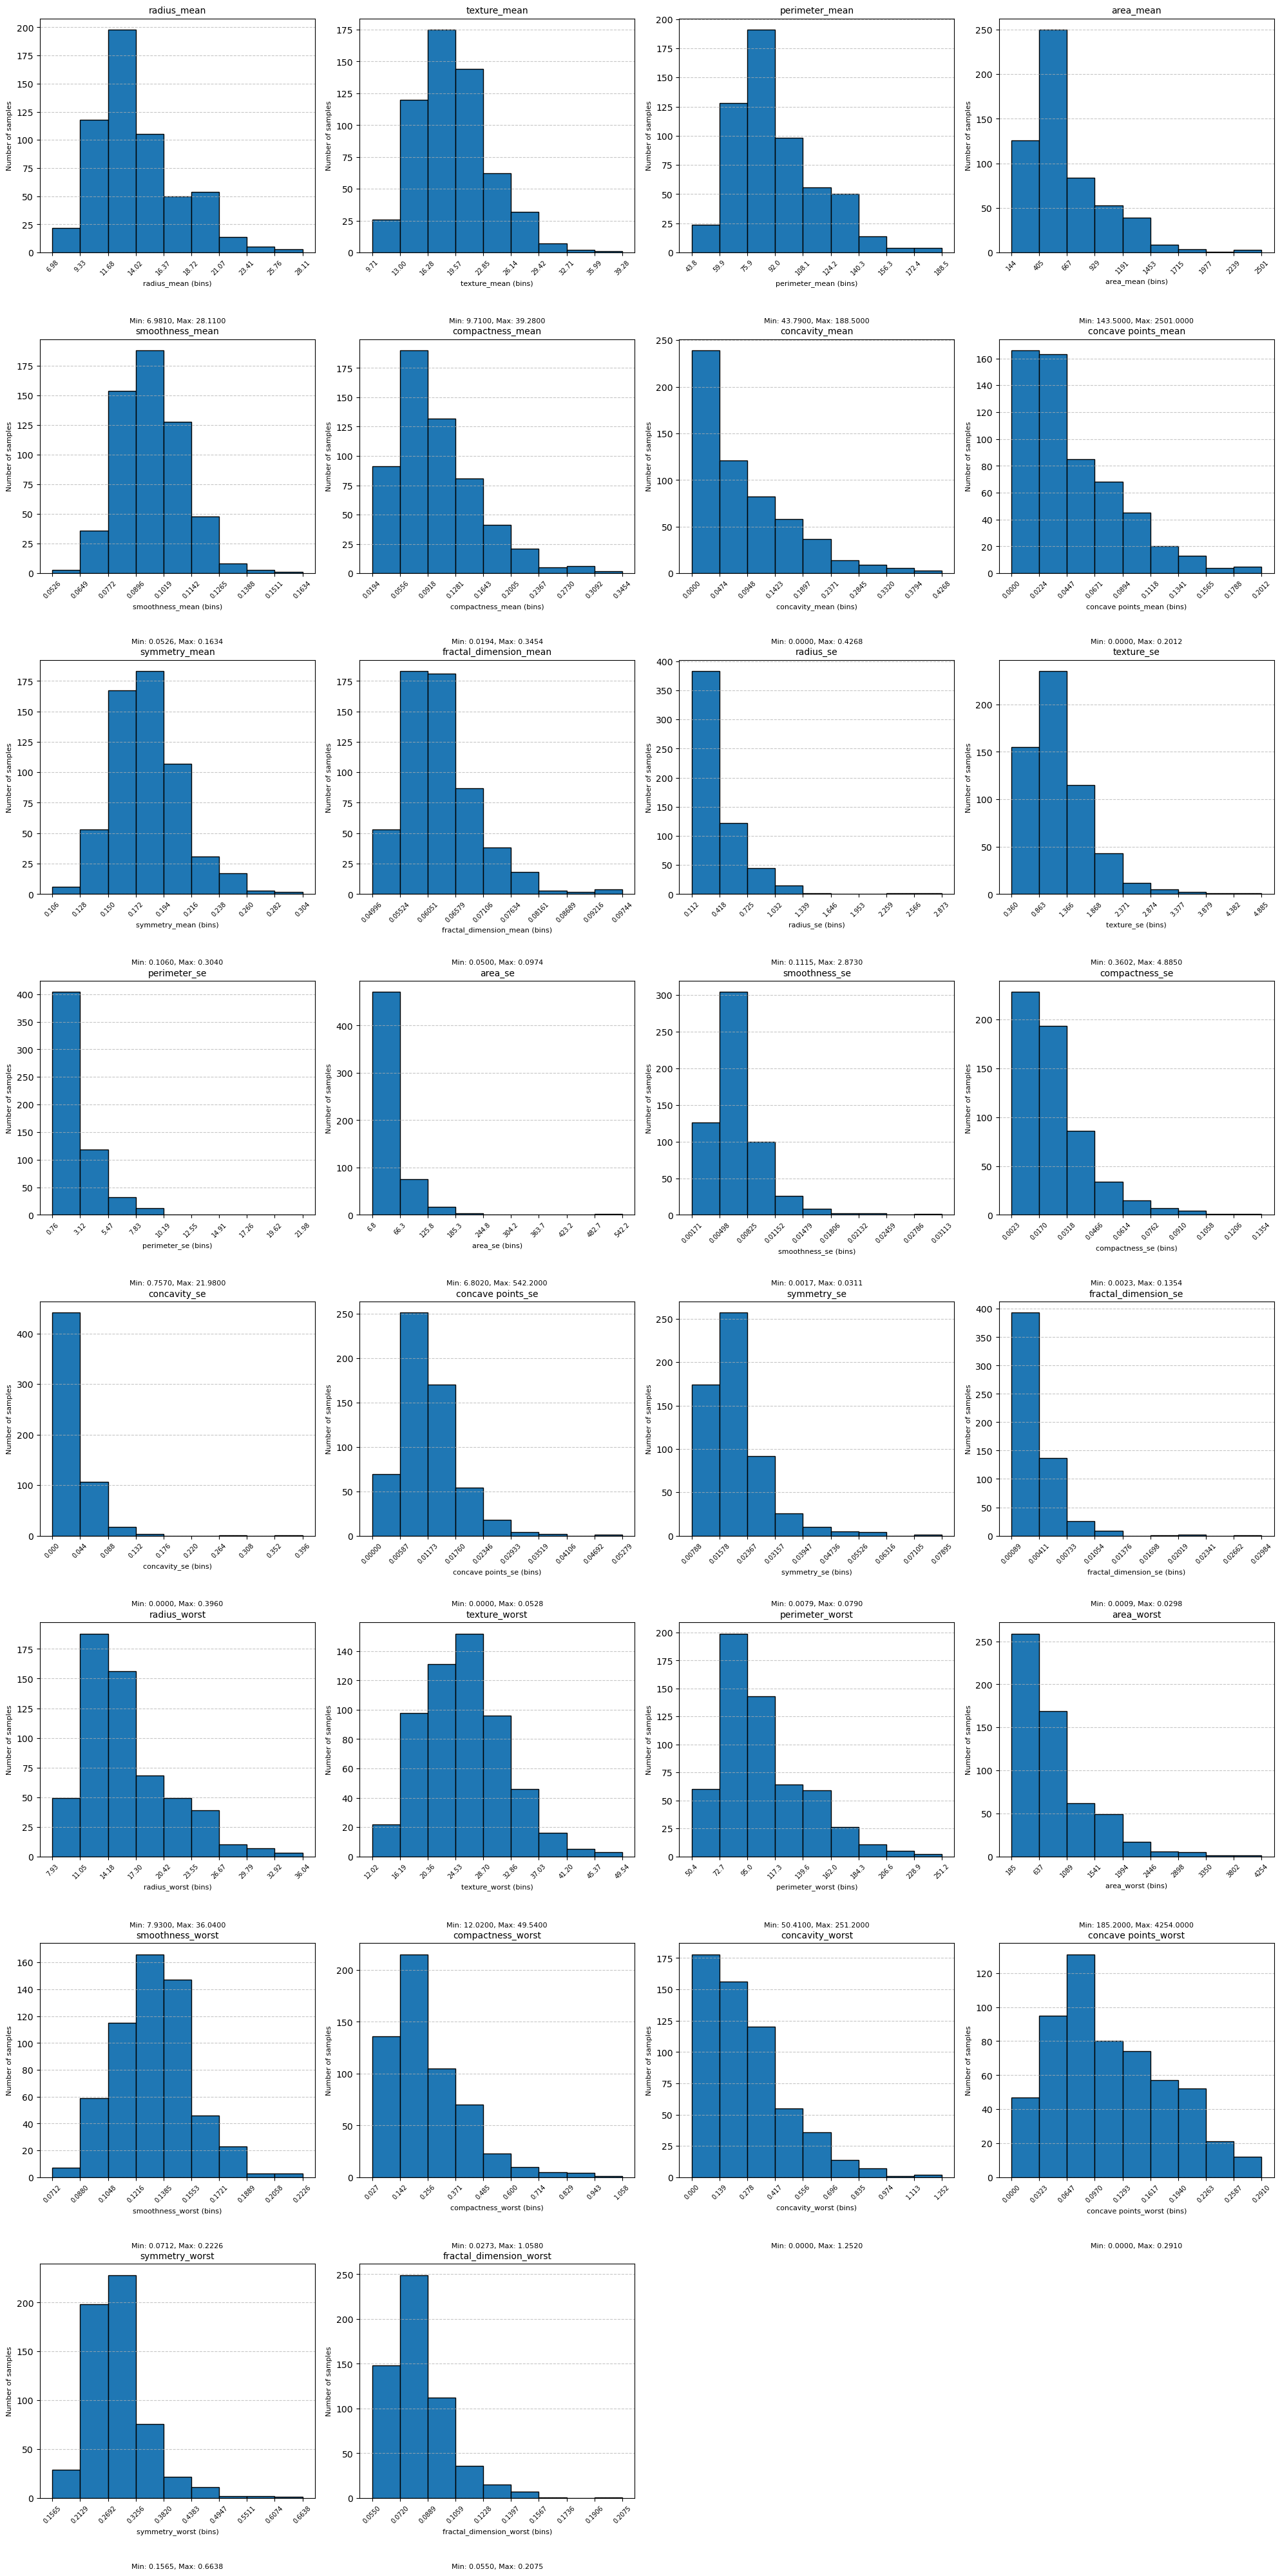

In [39]:
# Visualizing multiple plots side by side (3 or 4 per row)
import math

# Number of columns per row
cols_per_row = 4
columns_to_plot = Data.drop(columns=['id', 'diagnosis']).columns

# Total number of columns to plot
total_plots = len(columns_to_plot)

# Calculate rows required
rows = math.ceil(total_plots / cols_per_row)

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten for easy indexing

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    values = Data[column]
    min_value, max_value = values.min(), values.max()
    
    # Create bins
    bins = np.linspace(min_value, max_value, 10)
    bin_counts = np.histogram(values, bins=bins)[0]
    
    # Bar plot
    ax.bar(bins[:-1], bin_counts, width=(bins[1] - bins[0]), align='edge', edgecolor='black')
    ax.set_title(f'{column}', fontsize=10)
    ax.set_xlabel(f'{column} (bins)', fontsize=8)
    ax.set_ylabel('Number of samples', fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(bins)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    
    # Print min and max values under the graph
    ax.text(0.5, -0.3, f'Min: {min_value:.4f}, Max: {max_value:.4f}', 
            fontsize=8, transform=ax.transAxes, ha='center')

# Remove unused subplots
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Data Visualization Explanation

### Overview
The above visualizations represent the distributions of various features from the dataset. Each plot is a histogram of a specific feature, with values binned on the x-axis and the count of samples in each bin represented on the y-axis. These visualizations provide insight into the range and distribution of the features, helping to identify trends, patterns, and outliers.

---

### Feature Highlights

#### 1. `perimeter_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 514 (90%)
- **Min Value**: 50.41
- **Max Value**: 251.2
- **Key Observations**:
  - Most values are concentrated around lower perimeter values, with a few outliers on the higher end.
  - The distribution shows a positively skewed pattern.

#### 2. `area_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 544 (96%)
- **Min Value**: 185.2
- **Max Value**: 4254.0
- **Key Observations**:
  - The range of values is quite broad, with most samples clustering at the lower end.
  - There are significant outliers with very high area values.

#### 3. `smoothness_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 411 (72%)
- **Min Value**: 0.07117
- **Max Value**: 0.2226
- **Key Observations**:
  - The distribution is fairly narrow, indicating less variability in this feature.
  - A peak in the middle suggests that most samples have a similar smoothness.

#### 4. `compactness_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 529 (93%)
- **Min Value**: 0.02729
- **Max Value**: 1.058
- **Key Observations**:
  - Compactness values show a positively skewed distribution.
  - Most samples are concentrated in lower bins.

#### 5. `concavity_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 539 (95%)
- **Min Value**: 0.0
- **Max Value**: 1.252
- **Key Observations**:
  - Concavity is predominantly low for most samples, with a gradual tail toward higher values.
  - The presence of samples with zero concavity suggests distinct clusters.

#### 6. `concave points_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 492 (86%)
- **Min Value**: 0.0
- **Max Value**: 0.291
- **Key Observations**:
  - The distribution is heavily skewed, with most samples concentrated near zero.
  - The feature might be a strong indicator for sample categorization.

#### 7. `symmetry_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 500 (88%)
- **Min Value**: 0.1565
- **Max Value**: 0.6638
- **Key Observations**:
  - A nearly normal distribution with symmetry values clustered around the mean.
  - The lack of extreme outliers suggests stability in this feature.

#### 8. `fractal_dimension_worst`
- **Missing Values**: None (0%)
- **Distinct Values**: 535 (94%)
- **Min Value**: 0.05504
- **Max Value**: 0.2075
- **Key Observations**:
  - The distribution is slightly skewed, with a majority of values concentrated in lower bins.
  - Fractal dimension shows less variability compared to other features.

---

These visualizations highlight key patterns in the dataset and help to identify features with potential predictive value. Features with distinct distributions, such as `area_worst` and `concavity_worst`, may provide valuable insights for further analysis or modeling. On the other hand, tightly clustered features like `smoothness_worst` and `fractal_dimension_worst` exhibit less variation, which could indicate lower discriminatory power.


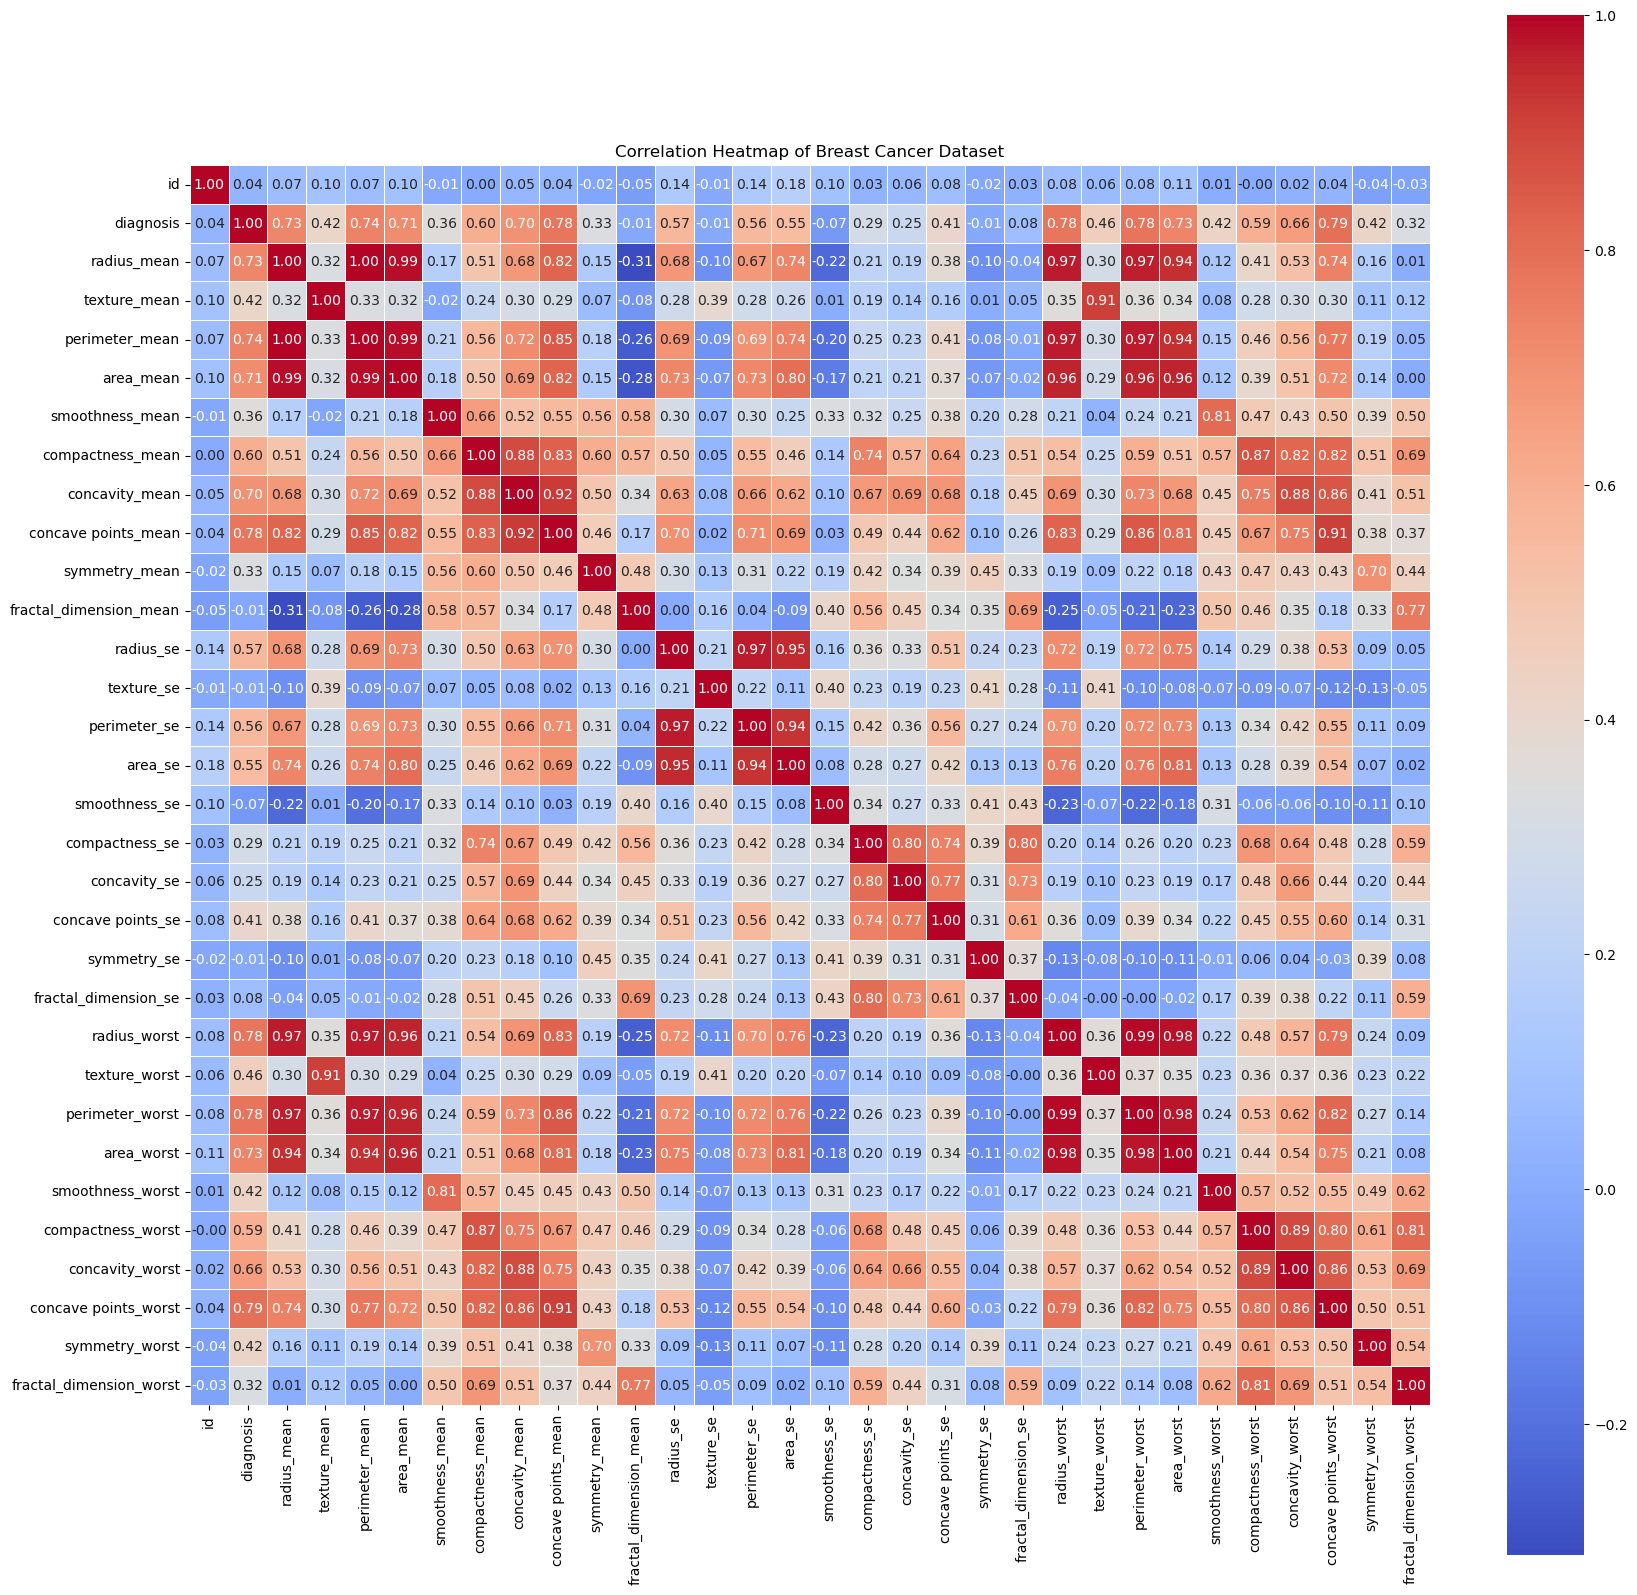

In [11]:

# Compute the correlation matrix
correlation_matrix = Data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Breast Cancer Dataset')

# Show the plot
plt.show()

### Correlation Matrix Insights

#### Highly Correlated Features with Diagnosis:
These features exhibit strong correlations with the diagnosis, making them valuable for predictive analysis:
- **Radius_mean** (High correlation with diagnosis)
- **Perimeter_mean**
- **Area_mean**
- **Compactness_mean**
- **Concavity_mean**
- **Concave points_mean**

#### Low or Weakly Correlated Features with Diagnosis:
These features show low or negligible correlation with the diagnosis, indicating limited predictive utility:
- **Symmetry_mean**
- **Texture_mean**
- **Fractal_dimension_mean**

#### Redundant Features:
Some features are highly correlated with each other, suggesting redundancy. Using both might not provide additional predictive power:
- **Radius_mean**, **Perimeter_mean**, and **Area_mean** (highly correlated with each other)
- **Compactness_mean**, **Concavity_mean**, and **Concave points_mean** (highly inter-correlated)

#### Key Takeaways:
- Focus on highly correlated features for prediction.
- Consider removing or combining redundant features to simplify the model.
- Exclude features with low correlation to reduce noise in the model.


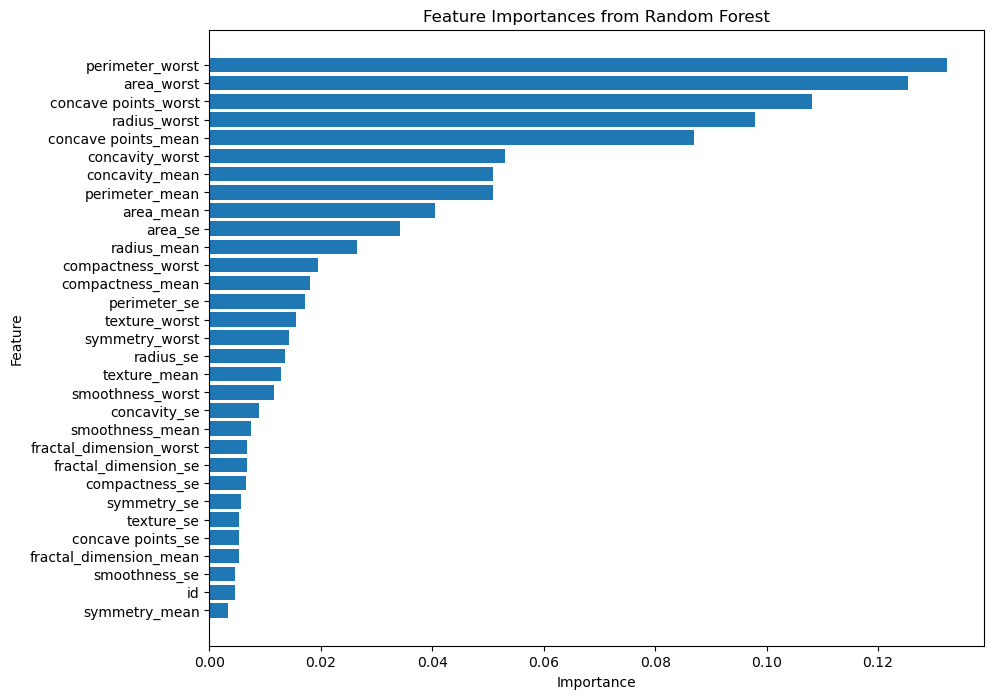

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Separate features and target variable without modifying the original DataFrame
X = Data.drop(columns=['diagnosis']).copy()
y = Data['diagnosis'].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


## Preparing data for model

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
Data = pd.read_csv('BrestCancerDataset/breast-cancer.csv')

# Change the diagnosis column to 1 if M and 0 if B
Data['diagnosis'] = Data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Compute the correlation matrix
correlation_matrix = Data.corr()

# Get the columns with correlation >= 0.4 with the diagnosis column
relevant_features = correlation_matrix.index[correlation_matrix['diagnosis'].abs() >= 0.4].tolist()

# Ensure 'diagnosis' is included in the relevant features
if 'diagnosis' not in relevant_features:
    relevant_features.append('diagnosis')

# Filter the DataFrame to keep only the relevant features
Data_filtered = Data[relevant_features]

# Separate features and target variable without modifying the original DataFrame
X = Data_filtered.drop(columns=['diagnosis']).copy()
y = Data_filtered['diagnosis'].copy()

# Split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the sizes of the datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 341
Validation set size: 114
Test set size: 114


In [42]:
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)

Shape of X_train :  (341, 20)
Shape of y_train :  (341,)


# Creating a model

### Experimenting with random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate and print the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print the classification report for the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print the classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.9561
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.93      0.95      0.94        44

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Test Accuracy: 0.9649
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Experimenting with SVM

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train an SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Calculate and print the validation accuracy
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM Validation Accuracy: {val_accuracy_svm:.4f}")

# Print the classification report for the validation set
print("SVM Validation Classification Report:")
print(classification_report(y_val, y_val_pred_svm))

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate and print the test accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Test Accuracy: {test_accuracy_svm:.4f}")

# Print the classification report for the test set
print("SVM Test Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

SVM Validation Accuracy: 0.9649
SVM Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.95      0.95      0.95        44

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

SVM Test Accuracy: 0.9737
SVM Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Experimenting with simple logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_logreg = logreg_model.predict(X_val)

# Calculate and print the validation accuracy
val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
print(f"Logistic Regression Validation Accuracy: {val_accuracy_logreg:.4f}")

# Print the classification report for the validation set
print("Logistic Regression Validation Classification Report:")
print(classification_report(y_val, y_val_pred_logreg))

# Predict on the test set
y_test_pred_logreg = logreg_model.predict(X_test)

# Calculate and print the test accuracy
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg:.4f}")

# Print the classification report for the test set
print("Logistic Regression Test Classification Report:")
print(classification_report(y_test, y_test_pred_logreg))

Logistic Regression Validation Accuracy: 0.9649
Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.95      0.95      0.95        44

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Logistic Regression Test Accuracy: 0.9737
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Experimenting with Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_gb = gb_model.predict(X_val)

# Calculate and print the validation accuracy
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
print(f"Gradient Boosting Validation Accuracy: {val_accuracy_gb:.4f}")

# Print the classification report for the validation set
print("Gradient Boosting Validation Classification Report:")
print(classification_report(y_val, y_val_pred_gb))

# Predict on the test set
y_test_pred_gb = gb_model.predict(X_test)

# Calculate and print the test accuracy
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print(f"Gradient Boosting Test Accuracy: {test_accuracy_gb:.4f}")

# Print the classification report for the test set
print("Gradient Boosting Test Classification Report:")
print(classification_report(y_test, y_test_pred_gb))

Gradient Boosting Validation Accuracy: 0.9561
Gradient Boosting Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.93      0.95      0.94        44

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Gradient Boosting Test Accuracy: 0.9474
Gradient Boosting Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



###  Experimenting with deeplearning model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

model = Sequential([
    Dense(64,input_shape=(X_train.shape[1],),activation='relu'),
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])


model.compile(optimizer = Adam(learning_rate=0.01),loss = 'binary_crossentropy',metrics=['accuracy'])


/usr/lib/python3/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9911 - loss: 0.0154 - val_accuracy: 0.9649 - val_loss: 0.4642
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9649 - val_loss: 0.4643
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9783 - loss: 0.0872 - val_accuracy: 0.9649 - val_loss: 0.3510
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9649 - val_loss: 0.3279
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9649 - val_loss: 0.3463
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0066 - val_accuracy: 0.9649 - val_loss: 0.3666
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9932 - loss: 0.0090 - val_accuracy: 0.9737 - val_loss: 0.3688
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.9649 - val_loss:

In [37]:

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict on the validation set
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")

# Print the classification report for the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print the classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.5052
Validation Accuracy: 0.9649
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.95      0.95      0.95        44

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.6282
Test Accuracy: 0.9649
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



# Model Performance Comparison

Below is a detailed comparison of the performance of different models (Support Vector Machine, Logistic Regression, Gradient Boosting, and Deep Learning) on both validation and test sets.

## **1. Validation Accuracy**

- **SVM**: 0.9649
- **Logistic Regression**: 0.9649
- **Gradient Boosting**: 0.9561
- **Deep Learning**: 0.9649

### **Validation Classification Report**

| Model              | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) | Accuracy |
|--------------------|---------------|------------|--------------|---------------|------------|--------------|----------|
| **SVM**            | 0.97          | 0.97       | 0.97         | 0.95          | 0.95       | 0.95         | 0.96     |
| **Logistic Regression** | 0.97       | 0.97       | 0.97         | 0.95          | 0.95       | 0.95         | 0.96     |
| **Gradient Boosting**  | 0.97       | 0.96       | 0.96         | 0.93          | 0.95       | 0.94         | 0.96     |
| **Deep Learning**    | 0.97       | 0.97       | 0.97         | 0.95          | 0.95       | 0.95         | 0.96     |

---

## **2. Test Accuracy**

- **SVM**: 0.9737
- **Logistic Regression**: 0.9737
- **Gradient Boosting**: 0.9474
- **Deep Learning**: 0.9649

### **Test Classification Report**

| Model              | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) | Accuracy |
|--------------------|---------------|------------|--------------|---------------|------------|--------------|----------|
| **SVM**            | 0.97          | 0.99       | 0.98         | 0.98          | 0.95       | 0.96         | 0.97     |
| **Logistic Regression** | 0.97       | 0.99       | 0.98         | 0.98          | 0.95       | 0.96         | 0.97     |
| **Gradient Boosting**  | 0.96       | 0.96       | 0.96         | 0.93          | 0.93       | 0.93         | 0.95     |
| **Deep Learning**    | 0.99       | 0.96       | 0.97         | 0.93          | 0.98       | 0.95         | 0.96     |

---

## **Summary and Comparison**

### **1. SVM vs Logistic Regression**
- Both models performed similarly on both the validation and test sets.
- **SVM** slightly edged out **Logistic Regression** on the test set, but both models had identical validation accuracies.
- Both models showed strong results in terms of precision, recall, and F1-score, with **SVM** performing slightly better in the recall for class 0 (0.99 vs. 0.97) on the test set.

### **2. Gradient Boosting**
- **Gradient Boosting** performed slightly worse on the validation and test sets compared to **SVM** and **Logistic Regression**.
- Although the performance is still good, with an accuracy of 0.95 on the test set, it had lower precision and recall, particularly for class 1 (0.93 precision and recall).

### **3. Deep Learning**
- The **Deep Learning** model performed quite well but did not outperform **SVM** or **Logistic Regression**.
- The model had strong recall for class 1 on the test set (0.98), but its precision for class 0 was slightly lower compared to other models (0.99 vs. 0.97).
- This model showed solid performance but slightly lagged behind **SVM** and **Logistic Regression** in terms of overall accuracy on the test set.

---

## **Conclusion**

- **Best Overall Performance**: **SVM** and **Logistic Regression** performed equally well, with **SVM** showing slightly better performance on the test set.
- **Deep Learning** showed competitive results, but with a slightly lower test accuracy compared to **SVM** and **Logistic Regression**.
- **Gradient Boosting** was the least performant among all models, especially on the test set, but it still provided a reasonable result with good precision and recall values.

In conclusion, **SVM** and **Logistic Regression** stand out as the best models, with **SVM** having a slight edge.